In [467]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# 2D Driven Cavity Flow Problem

In this assignment, we use the explicit MacCormack scheme to solve the flow in a fluid-filled square box (cavity), which is swirled by a uniformly translating lid shown in the schematic below (taken from the textbook).
![alt text](2Dcavity.png "Title")
The boundary conditions for the velocity components $\mathbf{u},\mathbf{v}$ in the $x,y$-directions on the four sides of the cavity are:
- __Top (lid)__: $u=U$ and $v=0$
- __Bottom__: $u=v=0$
- __Left__: $u=v=0$
- __Right__: $u=v=0$

### Set of equations describing the flow
The continuity equation and compressible Navier-Stokes equation (neglecting body force terms) in two-dimensions describing this flow are  

$$
\begin{align}
\frac{\partial \rho}{\partial t}+\frac{\partial (\rho u)}{\partial x}+\frac{\partial (\rho v)}{\partial y}&=0,\\
\frac{\partial (\rho u)}{\partial t} + \frac{\partial (\rho u^2)}{\partial x}+\frac{\partial (\rho v u)}{\partial y}&=-\frac{\partial p}{\partial x}+\mu\left(\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}\right)+\frac{\mu}{3}\frac{\partial}{\partial x}\left( \frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} \right),\\
\frac{\partial (\rho v)}{\partial t}+\frac{\partial (\rho u v)}{\partial x}+\frac{\partial (\rho v^2)}{\partial y}&=-\frac{\partial p}{\partial y}+\mu\left(\frac{\partial^2 v}{\partial x^2} + \frac{\partial^2 v}{\partial y^2}\right) +\frac{\mu}{3}\frac{\partial}{\partial y}\left( \frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} \right) 
\end{align}
$$

with the equation of state $p=c^2\rho$, where $c$ is the speed of sound in the fluid. For low Mach numbers (*i.e.*, $M=U/c$) the solution should approximate the incompressible limit where $c\to\infty$.

### MacCormack Scheme
This is a predictor-corrector scheme for a system of equations of the form

$$
\frac{\partial \mathbf{U}}{\partial t}+\frac{\partial \mathbf{E}(\mathbf{U})}{\partial t}+\frac{\partial \mathbf{F}(\mathbf{U})}{\partial t}=0.
$$
The two steps are:
$$
\begin{align}
\mathbf{U}^\ast_{i,j}=\mathbf{U}^n_{i,j}-\frac{\Delta t}{\Delta x}\left( \mathbf{E}^n_{i+1,j}-\mathbf{E}^n_{i,j} \right) -\frac{\Delta t}{\Delta y}\left( \mathbf{F}^n_{i,j+1}-\mathbf{F}^n_{i,j} \right), \text{ (Predictor) }\\
\mathbf{U}^{n+1}_{i,j}= \frac{1}{2}\left[\mathbf{U}^n_{i,j} + \mathbf{U}^\ast_{i,j} -\frac{\Delta t}{\Delta x}\left( \mathbf{E}^\ast_{i,j}-\mathbf{E}^\ast_{i-1,j} \right) -\frac{\Delta t}{\Delta y}\left( \mathbf{F}^\ast_{i,j}-\mathbf{F}^\ast_{i,j-1} \right)\right]. \text{ (Corrector) }
\end{align}
$$

The update variables are contained in the vector $\mathbf{U}=(\rho,\rho\mathbf{u},\rho\mathbf{v})$ and $\mathbf{E}$, and $\mathbf{F}$ are functions of the update variables and some of their spacial derivatives (we worked these out in class). The star variables are considered to be evaluated at time $t_{n+1}$ and used in the correction step to obtain the 'new' variables.
At the end of each time step, the 'old' variables at $t_{n}$ are replaced with the new variables from the last iteration.
The scheme is second-order accurate in time and space. This means that in both the predictor and corrector steps, the viscous terms (second-order derivative terms) are discretized with centered-differences to maintain second-order accuracy.



### Explicit MacCormack Scheme at each time step

1. For $0\leq i<nx$ and $0\leq j<ny$: 

$$u_{i,j}=\frac{(\rho u)_{i,j}^n}{\rho_{i,j}^n},\quad v_{i,j}=\frac{(\rho v)_{i,j}^n}{\rho_{i,j}^n}$$

2. For $1\leq i<nx-1$ and $1\leq j<ny-1$ (__Predictor__ interior):

$$
\begin{align}
\rho^{\ast}_{i,j}&=\rho^{n}_{i,j}-a_1\left[(\rho u)_{i+1,j}^n - (\rho u)_{i,j}^n \right] - a_2\left[(\rho v)_{i,j+1}^n-(\rho v)_{i,j}^n \right]\\
(\rho u)^{\ast}_{i,j}&= (\rho u)^n_{i,j}-a_3\left(\rho_{i+1,j}^n-\rho_{i,j}^n \right) -a_1\left[(\rho u^2)_{i+1,j}^n - (\rho u^2)_{i,j}^n \right]- a_2\left[(\rho u v)_{i,j+1}^n-(\rho u v)_{i,j}^n \right] - a_{10} u_{i,j} + a_5\left(u_{i+1,j}+u_{i-1,j}\right) + a_6\left(u_{i,j+1}+u_{i,j-1}\right)+a_9\left( v_{i+1,j+1}+v_{i-1,j-1}-v_{i+1,j-1}-v_{i-1,j+1} \right)\\
(\rho v)^{\ast}_{i,j}&= (\rho v)^n_{i,j}-a_4\left(\rho_{i,j+1}^n-\rho_{i,j}^n \right) -a_1\left[(\rho u v)_{i+1,j}^n - (\rho u v)_{i,j}^n \right]- a_2\left[(\rho v^2)_{i,j+1}^n-(\rho v^2)_{i,j}^n \right] - a_{11} v_{i,j} + a_7\left(v_{i+1,j}+v_{i-1,j}\right) + a_8\left(v_{i,j+1}+v_{i,j-1}\right)+a_9\left( u_{i+1,j+1}+u_{i-1,j-1}-u_{i+1,j-1}-u_{i-1,j+1} \right)
\end{align}
$$

3. Impose __Predictor__ boundary conditions for $\rho^{\ast}_{i,j}$, $(\rho u)^{\ast}_{i,j}$, $(\rho v)^{\ast}_{i,j}$:

$$
\begin{align}
\rho^{\ast}_{0,j}&=\rho^{n}_{0,j} - \frac{\Delta t}{2 \Delta x}\left[-(\rho u)_{+2,j}^n + 4(\rho u)_{+1,j}^n -3(\rho u)_{0,j}^n \right] \text{ (Left $x=0$ side including corners),}\\
\rho^{\ast}_{n_x,j}&=\rho^{n}_{n_x,j} - \frac{\Delta t}{2 \Delta x}\left[-(\rho u)_{n_x-2,j}^n + 4(\rho u)_{n_x-1,j}^n -3(\rho u)_{n_x,j}^n \right] \text{ (Right $x=D$ side including corners),}\\
\rho^{\ast}_{i,0}&=\rho^{n}_{j,0} - \frac{\Delta t}{2 \Delta y}\left[-(\rho u)_{i,+2}^n + 4(\rho u)_{i,+1}^n -3(\rho u)_{i,0}^n \right] \text{ (Bottom $y=0$),}\\
\rho^{\ast}_{i,n_y}&=\rho^{n}_{i,n_y} - \frac{\Delta t U}{2 \Delta x} \left[\rho^{n}_{i+1,n_y}-\rho^{n}_{i-1,n_y} \right] +
\frac{\Delta t}{2 \Delta y}\left[-(\rho u)_{i,n_y-2}^n + 4(\rho u)_{i,n_y-1}^n -3(\rho u)_{i,n_y}^n \right] \text{ (Top $y=D$)}
\end{align}
$$

4. For $0\leq i<nx$ and $0\leq j<ny$: 

$$u^{\ast}_{i,j}=\frac{(\rho u)_{i,j}^\ast}{\rho_{i,j}^\ast},\quad v_{i,j}^\ast=\frac{(\rho v)_{i,j}^\ast}{\rho_{i,j}^\ast}$$

5. For $1\leq i<nx-1$ and $1\leq j<ny-1$ (__Corrector__ interior):

$$
\begin{align}
2\rho^{n+1}_{i,j}=&\left(\rho^{n}_{i,j}+\rho^{\ast}_{i,j}\right)-a_1\left[(\rho u)_{i,j}^{\ast} - (\rho u)_{i-1,j}^{\ast} \right] - a_2\left[(\rho v)_{i,j}^{\ast}-(\rho v)_{i,j-1}^{\ast} \right]\\
2(\rho u)^{n+1}_{i,j}=& (\rho u)^n_{i,j}+(\rho u)^\ast_{i,j}-a_3\left(\rho_{i,j}^{\ast}-\rho_{i-1,j}^{\ast} \right) -a_1\left[(\rho u^2)_{i,j}^{\ast} - (\rho u^2)_{i-1,j}^{\ast} \right] - a_2\left[(\rho u v)_{i,j}^{\ast}-(\rho u v)_{i,j-1}^{\ast} \right] \\
&- a_{10} u^{\ast}_{i,j} + a_5\left(u_{i+1,j}^{\ast}+u_{i-1,j}^{\ast}\right) + a_6\left(u_{i,j+1}^{\ast}+u_{i,j-1}^{\ast}\right)+a_9\left( v^{\ast}_{i+1,j+1}+v^{\ast}_{i-1,j-1}-v^{\ast}_{i+1,j-1}-v^{\ast}_{i-1,j+1} \right)\\
2(\rho v)^{\ast}_{i,j}=& (\rho v)^n_{i,j} + (\rho v)^{\ast}_{i,j} - a_4\left(\rho_{i,j}^{\ast}-\rho_{i,j-1}^{\ast} \right) -a_1\left[(\rho u v)_{i,j}^{\ast} - (\rho u v)_{i-1,j}^{\ast} \right]- a_2\left[(\rho v^2)_{i,j}^{\ast}-(\rho v^2)_{i,j-1}^{\ast} \right] \\
&- a_{11} v^{\ast}_{i,j} + a_7\left(v^{\ast}_{i+1,j}+v^{\ast}_{i-1,j}\right) + a_8\left(v^{\ast}_{i,j+1}+v^{\ast}_{i,j-1}\right)+a_9\left( u^{\ast}_{i+1,j+1}+u^{\ast}_{i-1,j-1}-u^{\ast}_{i+1,j-1}-u^{\ast}_{i-1,j+1} \right)
\end{align}
$$

6. Impose __Corrector__ boundary conditions for $\rho^{n+1}_{i,j}$, $(\rho u)^{n+1}_{i,j}$, $(\rho v)^{n+1}_{i,j}$:

$$
\begin{align}
2\rho^{n+1}_{0,j}&=\rho^{n}_{0,j}+\rho^{\ast}_{0,j} - \frac{\Delta t}{2 \Delta x}\left[-(\rho u)_{+2,j}^{\ast} + 4(\rho u)_{+1,j}^{\ast} -3(\rho u)_{0,j}^{\ast} \right] \text{ (Left $x=0$ side including corners),}\\
2\rho^{n+1}_{n_x,j}&=\rho^{n}_{n_x,j}+\rho^{\ast}_{n_x,j} - \frac{\Delta t}{2 \Delta x}\left[-(\rho u)_{n_x-2,j}^{\ast} + 4(\rho u)_{n_x-1,j}^{\ast} -3(\rho u)_{n_x,j}^{\ast} \right] \text{ (Right $x=D$ side including corners),}\\
2\rho^{n+1}_{i,0}&=\rho^{n}_{j,0}+\rho^{\ast}_{i,0} - \frac{\Delta t}{2 \Delta y}\left[-(\rho u)_{i,+2}^{\ast} + 4(\rho u)_{i,+1}^{\ast} -3(\rho u)_{i,0}^{\ast} \right] \text{ (Bottom $y=0$),}\\
2\rho^{n+1}_{i,n_y}&=\rho^{n}_{i,n_y}+\rho^{\ast}_{i,n_y} - \frac{\Delta t U}{2 \Delta x} \left[\rho^{\ast}_{i+1,n_y}-\rho^{\ast}_{i-1,n_y} \right] +
\frac{\Delta t}{2 \Delta y}\left[-(\rho u)_{i,n_y-2}^{\ast} + 4(\rho u)_{i,n_y-1}^{\ast} -3(\rho u)_{i,n_y}^{\ast} \right] \text{ (Top $y=D$)}
\end{align}
$$

*Note:* Each time we impose the boundary conditions, we need to enforce the no-slip conditions for $\mathbf{u},\mathbf{v}$ at each of the cavity walls as well.

The coefficients are defined as:
$$
\begin{align}
a_1=\frac{\Delta t}{\Delta x},\quad a_2=\frac{\Delta t}{\Delta y},\quad a_3=\frac{\Delta t}{\Delta x M^2},\quad a_4=\frac{\Delta t}{\Delta y M^2},\quad a_5=\frac{4\Delta t}{3\mathrm{Re}(\Delta x)^2},\\
a_6=\frac{\Delta t}{\mathrm{Re} (\Delta y)^2},\quad a_7=\frac{\Delta t}{\mathrm{Re} (\Delta x)^2}, \quad a_8=\frac{4\Delta t}{3\mathrm{Re}(\Delta y)^2}, \quad a_9=\frac{\Delta t}{12\mathrm{Re}\Delta x \Delta y},\\
a_{10} = 2(a_5+a_6),\quad a_{11} = 2(a_7+a_8).
\end{align}
$$

In [503]:
def maccormack_cavity_flow(Nt, rho, rhou, rhov, dt, dx, dy, Re, M, U):
    '''
    Function carries out MacCormack iterations and returns rho, u, v after Nt time steps
    '''
    # Define coefficients 
    a1, a2 = dt/dx, dt/dy 
    a3, a4 = dt/(dx*M**2), dt/(dy*M**2)
    a5, a8 = 4*dt/(3*Re*dx**2), 4*dt/(3*Re*dy**2)
    a7, a6 = dt/(Re*dx**2), dt/(Re*dy**2)
    a9 = dt/(12*Re*dx*dy)
    a10, a11 = 2*(a5+a6), 2*(a7+a8)
    
    # Declare starred variables and new variables at t(n+1)
    rhos = np.empty_like(rho)
    rhous = np.empty_like(rhou)
    rhovs = np.empty_like(rhov)

    rhon = np.empty_like(rho)
    rhoun = np.empty_like(rhou)
    rhovn = np.empty_like(rhov)

    for t in range(NT):   

        # STEP 1 (all nodes)
        u = rhou/rho
        v = rhov/rho

        # STEP 2 PREDICTOR (interior nodes)
        rhos[1:-1,1:-1] = rho[1:-1,1:-1]-a1*(rhou[1:-1,2:]-rhou[1:-1,1:-1]) -a2*(rhov[2:,1:-1]-rhov[1:-1,1:-1])

        rhous[1:-1,1:-1] = rhou[1:-1,1:-1] - a3*(rho[1:-1,2:]-rho[1:-1,1:-1])-a1*((rho*u**2)[1:-1,2:]-(rho*u**2)[1:-1,1:-1])\
            -a2*( (rho*u*v)[2:,1:-1]-(rho*u*v)[1:-1,1:-1] ) -a10*u[1:-1,1:-1] + a5*(u[1:-1,2:]+u[1:-1,0:-2])\
            + a6*(u[2:,1:-1]+u[0:-2,1:-1]) + a9*(v[2:,2:]+v[0:-2,0:-2]-v[0:-2,2:]-v[2:,0:-2])

        rhovs[1:-1,1:-1] = rhov[1:-1,1:-1]-a4*(rho[2:,1:-1]-rho[1:-1,1:-1]) -a1*((rho*u*v)[1:-1,2:]-(rho*u*v)[1:-1,1:-1] )\
            -a2*((rho*v**2)[2:,1:-1]-(rho*v**2)[1:-1,1:-1])-a11*v[1:-1,1:-1]+ a7*(v[1:-1,2:]+v[1:-1,0:-2])\
            + a8*(v[2:,1:-1]+v[0:-2,1:-1]) + a9*(u[2:,2:]+u[0:-2,0:-2]-u[0:-2,2:]-u[2:,0:-2])

        # STEP 3 PREDICTOR (boundary conditions)
        rhos[-1,1:-1] = rho[-1,1:-1] - dt*U/(2*dx) *(rho[-1,2:]-rho[-1,0:-2]) \
                        + dt/(2*dy) * (-(rhov)[-3,1:-1] + 4*(rhov)[-2,1:-1]-3*(rhov)[-1,1:-1] )#Top
        rhos[:,0] = rho[:,0] - dt/(2*dx) * (-rhou[:,2] + 4*rhou[:,1]-3*rhou[:,0])#Left
        rhos[:,-1] = rho[:,-1] - dt/(2*dx) * (-rhou[:,-3] + 4*rhou[:,-2]-3*rhou[:,-1])#Right
        rhos[0,:] = rho[0,:] - dt/(2*dy) * (-(rhov)[2,:] + 4*(rhov)[1,:]-3*(rhov)[0,:])#Bottom

        # Impose no-slip BCs on starred variables 
        rhous[-1,:] = U
        rhous[:, 0] = 0.
        rhous[:,-1] = 0.
        rhous[0, :] = 0.

        rhovs[-1,:] = 0.
        rhovs[:, 0] = 0.
        rhovs[:,-1] = 0.
        rhovs[0, :] = 0.
        
        # Ensures divergence-free field 
        rhos[:,-1]=rhos[:,-2] # d(rho)/dx = 0 at x = D
        rhos[0, :]=rhos[1, :] # d(rho)/dy = 0 at y = 0
        rhos[:, 0]=rhos[:, 1] # d(rho)/dx = 0 at x = 0

        # STEP 4
        us = rhous/rhos
        vs = rhovs/rhos

        # STEP 5 CORRECTOR (interior nodes)
        rhon[1:-1,1:-1] = ((rho[1:-1,1:-1]+rhos[1:-1,1:-1])-a1*(rhous[1:-1,1:-1]-rhous[1:-1,0:-2])\
            -a2*(rhovs[1:-1,1:-1]-rhovs[0:-2,1:-1]))/2.

        rhoun[1:-1,1:-1] = (rhou[1:-1,1:-1] + rhous[1:-1,1:-1] - a3*(rhos[1:-1,1:-1]-rhos[1:-1,0:-2])\
            -a1*( (rhos*us**2)[1:-1,1:-1]-(rhos*us**2)[1:-1,0:-2])-a2*((rhos*us*vs)[1:-1,1:-1]-(rhos*us*vs)[0:-2,1:-1] ) \
            -a10*us[1:-1,1:-1] + a5*(us[1:-1,2:]+us[1:-1,0:-2]) + a6*(us[2:,1:-1]+us[0:-2,1:-1]) \
            + a9*(vs[2:,2:]+vs[0:-2,0:-2]-vs[0:-2,2:]-vs[2:,0:-2]))/2.       

        rhovn[1:-1,1:-1] = (rhov[1:-1,1:-1]+rhovs[1:-1,1:-1] - a4*(rhos[1:-1,1:-1]-rhos[0:-2,1:-1]) \
            -a1*((rhos*us*vs)[1:-1,1:-1]-(rhos*us*vs)[1:-1,0:-2])-a2*((rhos*vs**2)[1:-1,1:-1]-(rhos*vs**2)[0:-2,1:-1])\
            -a11*vs[1:-1,1:-1]+ a7*(vs[1:-1,2:]+vs[1:-1,0:-2])+ a8*(vs[2:,1:-1]+vs[0:-2,1:-1])\
            + a9*(us[2:,2:]+us[0:-2,0:-2]-us[0:-2,2:]-us[2:,0:-2]))/2.    

        # STEP 6 CORRECTOR (boundary conditions)
        rhon[-1,1:-1] = (rho[-1,1:-1]+rhos[-1,1:-1] - dt*U/(2*dx) *(rhos[-1,2:]-rhos[-1,0:-2]) \
            + dt/(2*dy) * (-rhovs[-3,1:-1] + 4*rhovs[-2,1:-1]-3*rhovs[-1,1:-1] ))/2.
        rhon[:,0] = (rho[:,0]+rhos[:,0] - dt/(2*dx) * (-rhous[:,2] + 4*rhous[:,1]-3*rhous[:,0] ))/2. 
        rhon[:,-1] = (rho[:,-1] + rhos[:,-1] - dt/(2*dx)*(-rhous[:,-3]+4*rhous[:,-2]-3*rhous[:,-1]))/2.
        rhon[0,:] = (rho[0,:]+rhos[0,:] - dt/(2*dy) * (-rhovs[2,:] + 4*rhovs[1,:]-3*rhovs[0,:] ))/2.

        # Impose BCs on sides of the cavity
        rhoun[-1,:] = U
        rhoun[:, 0] = 0.
        rhoun[:,-1] = 0.
        rhoun[0, :] = 0.

        rhovn[-1,:] = 0.
        rhovn[:, 0] = 0.
        rhovn[:,-1] = 0.
        rhovn[0, :] = 0.
        
        # Enforce divergence-free field 
        rhon[:,-1]=rhon[:,-2]
        rhon[0, :]=rhon[1, :]
        rhon[:, 0]=rhon[:, 1]
       
        #Starting values are the "new" values at the last time step
        rho = rhon.copy()
        rhou = rhoun.copy()
        rhov = rhovn.copy()
        
    return rho, rhou/rho, rhov/rho
   

### Comments on parameters selected
*Note:* There is also a stability criterion for the explicit MacCormack scheme, which for moderate flow Reynolds numbers ($\mathrm{Re}=10$ to $500$) and small Mach numbers reduces to $\Delta t \leq\frac{\Delta x}{2 c}$. This time step is pretty sensitive and can lead to blow-up. I found $\Delta t = 0.001$ worked well with $\Delta x =\Delta y = 0.025$ so I just set up my mesh to use these. 

In the Hou et al. and Ghia et al. figures they used an $nx\times ny=256\times256$ uniform grid with $M=0.1$ (for almost incompressible flow) and simulated flows with two Reynolds numbers $\mathrm{Re}=\rho_0 UD/\mu =100$ and $\mathrm{Re}=400$. I couldn't find specific details for their exact parameter values other than "calculations need to be run long enough to get to the steady state". I just picked some values that seemed reasonable, ran it for as many time-steps as possible, and hoped for the best (_i.e._ my plots might not exactly match Kundu and Cohen, Version 3, Chapter 11, Figure 11.8 and 11.10 but look similar-ish).

In [504]:
'''
Specifying parameters
''' 
nx = 41 # Number of points in space (x-direction)
ny = 41 # Number of points in space (y-direction)
D = 1.# Size of square cavity
U = 1. # Constant velocity of sliding lid
dx=D/(nx-1) # Mesh spacing (x-direction)
dy=D/(ny-1) # Mesh spacing (y-direction)

# Needed for plotting
x = np.linspace(0, D, nx)
y = np.linspace(0, D, ny)

# Initial update variable arrays needed to initiate MacCormack scheme
rho = np.ones((ny,nx))#
rhou = np.zeros((ny,nx))
rhov = np.zeros((ny,nx))
rhou[-1,1:-1]=U #Initial condition on lid (not including corners)

dt = 0.001 #Size of time steps
Nt = 500 #Number of time steps

Re = 100 # Flow Reynolds number (100 or 400)
M = 0.1 # Mach number for approximating incompressible flow


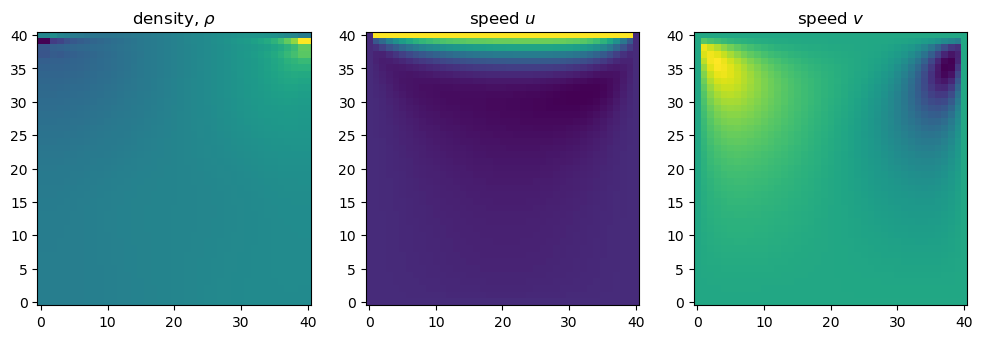

In [505]:
[rho, u, v]=maccormack_cavity_flow(Nt, rho, rhou, rhov, dt, dx, dy, Re, M, U)

#Some plots I found helpful for debugging
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(12, 6), dpi=100)
ax0.set_title(r'density, $\rho$')
ax0.imshow(rho,origin='lower')
ax1.set_title(r'speed $u$')
ax1.imshow(u,origin='lower')
ax2.set_title(r'speed $v$')
ax2.imshow(v,origin='lower')
plt.show()


In [506]:
def plot_streamlines(rho,u,v,x,y):
    '''
    Plotting function for streamlines and density contours
    '''
    X, Y = np.meshgrid(x, y)
    fig = plt.figure(figsize=(11,7), dpi=100)
    #plotting the density/pressure field as a contour
    plt.contourf(X, Y, rho, alpha=0.5, cmap=cm.viridis)  
    plt.colorbar()
    #plotting the density/pressure field outlines
    plt.contour(X, Y, rho, cmap=cm.viridis)  
    #plotting velocity field (show every other point, looks messy otherwise)
    plt.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2],alpha=0.5) 
    #plotting streamlines for velocity field
    plt.streamplot(X, Y, u, v, color='k')
    plt.xlabel('X')
    plt.ylabel('Y');

## Velocity vector field and streamlines for Re=100 and 400
Figure 11.8 in Kundu and Cohen compares the results from the explicit MacCormack scheme and those calculated using a Lattice Boltzmann Method (Hou et al.). For the explicit MacCormack scheme, the center of the primary eddy is found at $(0.62\pm0.02,0.74\pm0.02)$ when $\mathrm{Re}=100$ and at $(0.57\pm0.02,0.61\pm0.02)$ when $\mathrm{Re}=400$.

### My results for Re=100

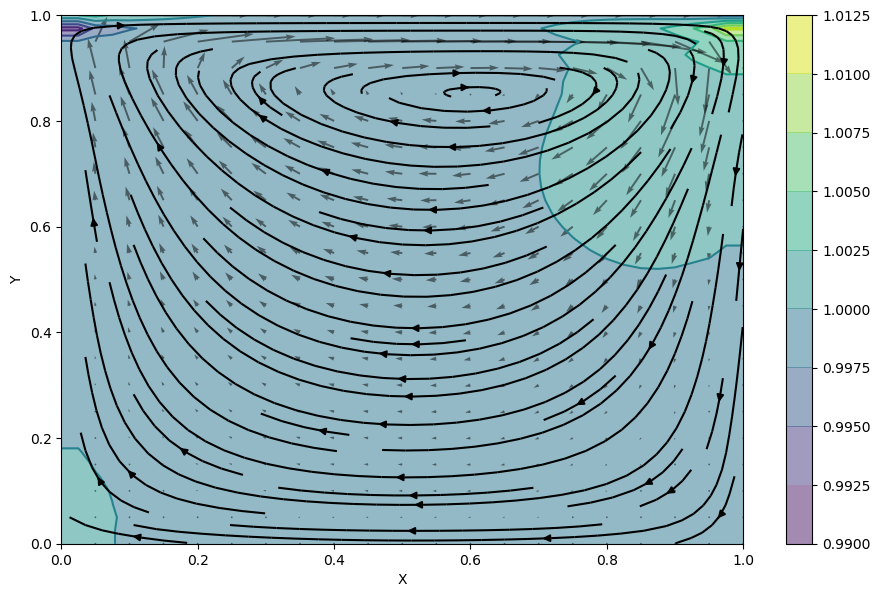

In [507]:
[rho_100, u_100, v_100]=maccormack_cavity_flow(Nt, rho, rhou, rhov, dt, dx, dy, 100, M, U)
plot_streamlines(rho_100,u_100,v_100,x,y)

### My results for Re=400

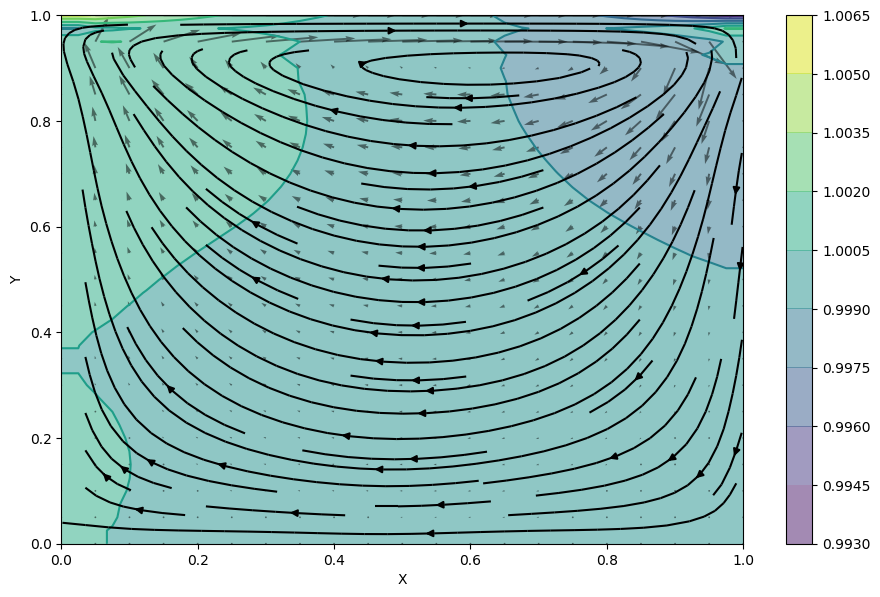

In [509]:
[rho_400, u_400, v_400]=maccormack_cavity_flow(Nt, rho, rhou, rhov, dt, dx, dy, 400, M, U)
plot_streamlines(rho_400,u_400,v_400,x,y)

The overall pattern of the density field matches Figure 11.8 and the center of the primary eddies also seem to agree (at least in the $x$-direction). The center of my eddies may be a little high in the $y$-direction, probably because I'm using different mesh parameters and not running it for as long as they did.

## Velocity profile along a vertical line cut through the center of the cavity 
The figure below shows the comparison of velocity profiles along a line cut through the center of the cavity ($x=0.5D$) at $\mathrm{Re}=100$ and $400$ from the textbook.
![alt text](velocityslice.png "Title")

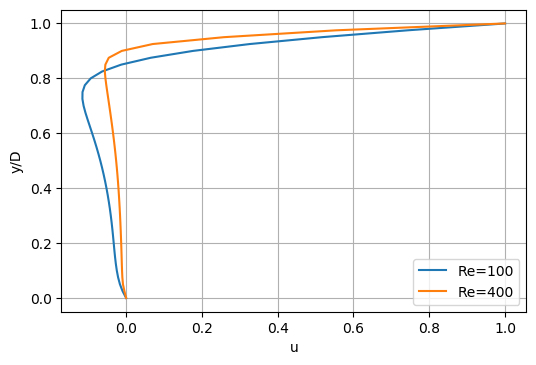

In [517]:
index_c = round(nx/2) #Find index corresponding to center of cavity

fig = plt.figure(figsize=(6,4), dpi=100)
plt.plot(u_100[:,index_c],y,label='Re=100')
plt.plot(u_400[:,index_c],y, label='Re=400')
plt.xlabel('u')
plt.ylabel('y/D')
plt.legend()
plt.grid(True)

Agreement between my plot and theirs could be better, but the shape agrees at least qualitatively. Hopefully this is good enough to show my code is working the way I claim and corresponds to what is in the book!